In [24]:
# Interoperable file paths
import os
# Find the home folder
import pathlib
# Work with vector data
import geopandas as gpd
# Interactive plots of vector data
import hvplot.pandas
# Save maps and plots to files
import holoviews as hv
#Import raster file
import rioxarray as rxr
# Get boundaries
from math import floor, ceil
# Open netCDF
import xarray as xr

In [2]:
# Check working directory
pathlib.Path.home()

WindowsPath('C:/Users/alison')

In [3]:
# Define and create the project data directory (separate from GH repo folder)
data_dir = os.path.join(
    pathlib.Path.home(),
    'Documents',
    'earth-analytics-class',
    'data',
    'habitat'
)

os.makedirs(data_dir, exist_ok=True)

data_dir

'C:\\Users\\alison\\Documents\\earth-analytics-class\\data\\habitat'

## Grassland Boundary

In [4]:
# Download USFS National Grassland Units
grassland_url = ("https://data.fs.usda.gov/geodata/edw/edw_resources/shp/S_USA.NationalGrassland.zip")

grassland_dir = os.path.join(data_dir, 'grassland')

os.makedirs(grassland_dir, exist_ok=True)

grassland_path = os.path.join (grassland_dir, 'grassland.shp')

# Only download data once
if not os.path.exists(grassland_path):
    # Download sample raster data
    grassland_gdf = gpd.read_file(grassland_url)
    grassland_gdf.to_file(grassland_path)

# Read in shapefile file from computer
grassland_gdf = gpd.read_file(grassland_path)

# View grassland geodataframe
grassland_gdf

,NATIONALGR,GRASSLANDN,GIS_ACRES,SHAPE_AREA,SHAPE_LEN,geometry
0,281771010328,Fort Pierre National Grassland,209044.225,0.095149,1.455518,"POLYGON ((-100.08409 44.28162, -100.08409 44.2..."
1,295507010328,Butte Valley National Grassland,19489.170,0.008557,0.853736,"MULTIPOLYGON (((-121.996 41.84049, -121.996 41..."
2,295508010328,Kiowa National Grassland,144281.321,0.058543,9.858642,"MULTIPOLYGON (((-104.30414 36.08063, -104.3041..."
3,295509010328,Sheyenne National Grassland,70428.175,0.033356,4.097398,"MULTIPOLYGON (((-97.31081 46.51457, -97.30559 ..."
4,295510010328,Cedar River National Grassland,6717.517,0.003157,0.999947,"MULTIPOLYGON (((-101.82221 45.95896, -101.8170..."
5,295511010328,Black Kettle National Grassland,33103.349,0.013340,4.561060,"MULTIPOLYGON (((-99.91659 35.71892, -99.91661 ..."
6,295512010328,Rita Blanca National Grassland,94127.091,0.038271,6.652113,"MULTIPOLYGON (((-102.62993 36.44072, -102.6298..."
7,295513010328,Thunder Basin National Grassland,626249.208,0.282888,44.088050,"MULTIPOLYGON (((-105.46005 43.31908, -105.4601..."
8,295514010328,McClellan Creek National Grassland,1401.715,0.000562,0.115902,"POLYGON ((-100.86003 35.20951, -100.86008 35.2..."
9,295515010328,Caddo National Grassland,68479.549,0.026940,1.159342,"MULTIPOLYGON (((-95.85492 33.79814, -95.85494 ..."


In [5]:
# Plot the data (with basemap)
grassland_map = grassland_gdf.hvplot(
    # Givethe map a descriptive title
    title="USFS Grassland Units",
    # Add a basemap
    geo=True, tiles='EsriImagery',
    # Add labels when hover over
    hover_cols=["GRASSLANDN"],
    # Change the colors & line thickness
    fill_color='white', fill_alpha=0.2,
    line_color='skyblue', line_width=1,
    # Change the image size
    frame_width=400, frame_height=400)

grassland_map

c:\Users\alison\miniconda3\envs\earth-analytics-python\Lib\site-packages\dask\dataframe\__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


:Overlay
   .WMTS.I     :WMTS   [Longitude,Latitude]
   .Polygons.I :Polygons   [Longitude,Latitude]   (GRASSLANDN)

In [6]:
# Choose 1st grassland site
pawnee_gdf = (grassland_gdf[grassland_gdf['GRASSLANDN'] == 'Pawnee National Grassland'])
pawnee_gdf

,NATIONALGR,GRASSLANDN,GIS_ACRES,SHAPE_AREA,SHAPE_LEN,geometry
15,295523010328,Pawnee National Grassland,208424.885,0.089972,15.341594,"MULTIPOLYGON (((-104.58106 40.82664, -104.5810..."


In [7]:
#Plot 1st grassland site

pawnee_gdf.hvplot(
    # Givethe map a descriptive title
    title="Pawnee Grassland",
    # Add a basemap
    geo=True, tiles='EsriImagery',
    # Add labels when hover over
    hover_cols=["GRASSLANDN"],
    # Change the colors & line thickness
    fill_color='white', fill_alpha=0.2,
    line_color='skyblue', line_width=1,
    # Change the image size
    frame_width=400, frame_height=400)

:Overlay
   .WMTS.I     :WMTS   [Longitude,Latitude]
   .Polygons.I :Polygons   [Longitude,Latitude]   (GRASSLANDN)

In [8]:
# Choose 2nd grassland site
comanche_gdf = (grassland_gdf[grassland_gdf['GRASSLANDN'] == 'Comanche National Grassland'])
comanche_gdf

,NATIONALGR,GRASSLANDN,GIS_ACRES,SHAPE_AREA,SHAPE_LEN,geometry
14,295522010328,Comanche National Grassland,444413.904,0.183064,26.658022,"MULTIPOLYGON (((-104.02263 37.69224, -104.0225..."


In [9]:
#Plot 2nd grassland site

comanche_gdf.hvplot(
    # Givethe map a descriptive title
    title="Comanche Grassland",
    # Add a basemap
    geo=True, tiles='EsriImagery',
    # Add labels when hover over
    hover_cols=["GRASSLANDN"],
    # Change the colors & line thickness
    fill_color='white', fill_alpha=0.2,
    line_color='skyblue', line_width=1,
    # Change the image size
    frame_width=400, frame_height=400)

:Overlay
   .WMTS.I     :WMTS   [Longitude,Latitude]
   .Polygons.I :Polygons   [Longitude,Latitude]   (GRASSLANDN)

## POLARIS Soil Data

<Axes: >

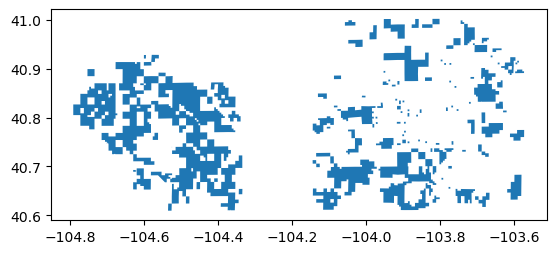

In [10]:
# Find boundary extent of grassland
pawnee_gdf.plot()

In [11]:
pawnee_gdf.total_bounds

array([-104.7914421 ,   40.60956304, -103.57328565,   41.00184675])

In [12]:
bounds_min_lon, bounds_min_lat, bounds_max_lon, bounds_max_lat = (pawnee_gdf.total_bounds)

for value in range(floor(bounds_min_lon), ceil(bounds_max_lon)):
    print(value)

-105
-104


In [13]:
# Download POLARIS soil data (example with 1 tile)

soil_url_template = ("http://hydrology.cee.duke.edu/POLARIS/PROPERTIES/v1.0"
            "/ph"
            "/mean"
            "/0_5"
            "/lat{min_lat}{max_lat}_lon{min_lon}{max_lon}.tif")

soil_url = soil_url_template.format(min_lat=40, max_lat=41, min_lon =-105, max_lon =-104)

soil_url

'http://hydrology.cee.duke.edu/POLARIS/PROPERTIES/v1.0/ph/mean/0_5/lat4041_lon-105-104.tif'

In [14]:
# Loop through to download multiple tiles at once

soil_url_list = []
for value in range(floor(bounds_min_lon), ceil(bounds_max_lon)):
    soil_url = soil_url_template.format(
        min_lat=40, max_lat=41, 
        min_lon=value, max_lon=value+1)
    soil_url_list.append(soil_url)
    
soil_url_list

['http://hydrology.cee.duke.edu/POLARIS/PROPERTIES/v1.0/ph/mean/0_5/lat4041_lon-105-104.tif',
 'http://hydrology.cee.duke.edu/POLARIS/PROPERTIES/v1.0/ph/mean/0_5/lat4041_lon-104-103.tif']

In [15]:
#Open raster file
soil_da = rxr.open_rasterio(
    soil_url,
    mask_and_scale=True
    ).squeeze()

soil_da

<xarray.DataArray (y: 3600, x: 3600)> Size: 52MB
[12960000 values with dtype=float32]
Coordinates:
    band         int64 8B 1
  * x            (x) float64 29kB -104.0 -104.0 -104.0 ... -103.0 -103.0 -103.0
  * y            (y) float64 29kB 41.0 41.0 41.0 41.0 ... 40.0 40.0 40.0 40.0
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Area

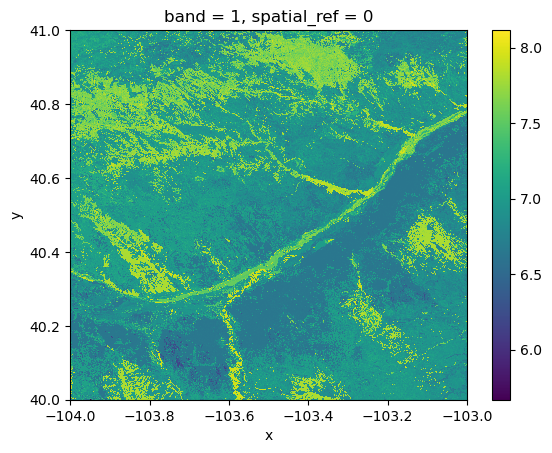

In [16]:
# Plot soil raster
soil_da.plot()

## MACAv2 Climate Data

In [22]:
# Access MACAv2 data

# Define start and end year
start_year = 2091
end_year = start_year + 4

# save url with year as customizable
maca_url_template = ('http://thredds.northwestknowledge.net:8080/thredds/catalog'
            '/MACAV2/CCSM4/catalog.html'
            '?dataset=REACCHDatasetScan_CCSM4_MACAV2'
            '/macav2metdata_pr_CCSM4_r6i1p1_rcp85_'
            '{start_year_val}_{end_year_val}_CONUS_monthly.nc')

# Insert start and end year
maca_url = maca_url_template.format(start_year_val = start_year, end_year_val = end_year)

maca_url

'http://thredds.northwestknowledge.net:8080/thredds/catalog/MACAV2/CCSM4/catalog.html?dataset=REACCHDatasetScan_CCSM4_MACAV2/macav2metdata_pr_CCSM4_r6i1p1_rcp85_2091_2095_CONUS_monthly.nc'

In [ ]:
# Open netCDF
maca_da = xr.open_dataset(maca_url)
maca_da

OSError: [Errno -75] NetCDF: Malformed or unexpected Constraint: 'http://thredds.northwestknowledge.net:8080/thredds/catalog/MACAV2/CCSM4/catalog.html?dataset=REACCHDatasetScan_CCSM4_MACAV2/macav2metdata_pr_CCSM4_r6i1p1_rcp85_2091_2095_CONUS_monthly.nc'